# Proyek Prediksi Risiko Diabetes Berdasarkan Karakteristik Klinis Pasien
- **Nama:** Putra Faaris Prayoga
- **Email:** putrafaariz47@gmail.com
- **ID Dicoding:** putra_faaris

## Library

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore

## Loading data


In [20]:
# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

In [21]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preprocessing



### cleaning

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
print("Cek nilai null pada data:\n", data.isnull().sum())  # Menampilkan jumlah nilai null pada setiap kolom

Cek nilai null pada data:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [24]:
print("\nCek duplikat pada data:\n", data.duplicated().sum())  # Menampilkan jumlah duplikat dalam dataset


Cek duplikat pada data:
 0


In [25]:
# Deteksi Outlier menggunakan Z-Score
z_scores = np.abs(zscore(data.drop('Outcome', axis=1)))

# Tentukan ambang batas Z-Score (misalnya lebih besar dari 3 dianggap sebagai outlier)
threshold = 3
outliers = (z_scores > threshold)

In [26]:
# Menampilkan jumlah outlier di setiap kolom
outliers_count = np.sum(outliers, axis=0)
print("\nJumlah outlier di setiap fitur:")
print(outliers_count)


Jumlah outlier di setiap fitur:
Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                         14
DiabetesPedigreeFunction    11
Age                          5
dtype: int64


In [27]:
# Mengurus Outlier: Menghapus baris yang mengandung outlier
data = data[~(outliers.any(axis=1))]  # Menghapus baris yang memiliki outlier

In [28]:
# Deteksi Outlier menggunakan Z-Score
z_scores = np.abs(zscore(data.drop('Outcome', axis=1)))

# Tentukan ambang batas Z-Score (misalnya lebih besar dari 3 dianggap sebagai outlier)
threshold = 3
outliers = (z_scores > threshold)

In [29]:
# Menampilkan jumlah outlier di setiap kolom
outliers_count = np.sum(outliers, axis=0)
print("\nJumlah outlier di setiap fitur:")
print(outliers_count)


Jumlah outlier di setiap fitur:
Pregnancies                 0
Glucose                     0
BloodPressure               7
SkinThickness               0
Insulin                     7
BMI                         3
DiabetesPedigreeFunction    9
Age                         1
dtype: int64


### EDA


In [30]:
# 1. Data info
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,3.845930,120.293605,72.345930,20.787791,72.507267,32.209157,0.454555,33.094477,0.329942
std,3.279256,30.005790,12.312859,15.405391,90.106939,6.618891,0.284527,11.436990,0.470534
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,23.000000,43.500000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,126.000000,36.300000,0.605500,40.000000,1.000000
max,13.000000,199.000000,122.000000,60.000000,415.000000,55.000000,1.461000,68.000000,1.000000


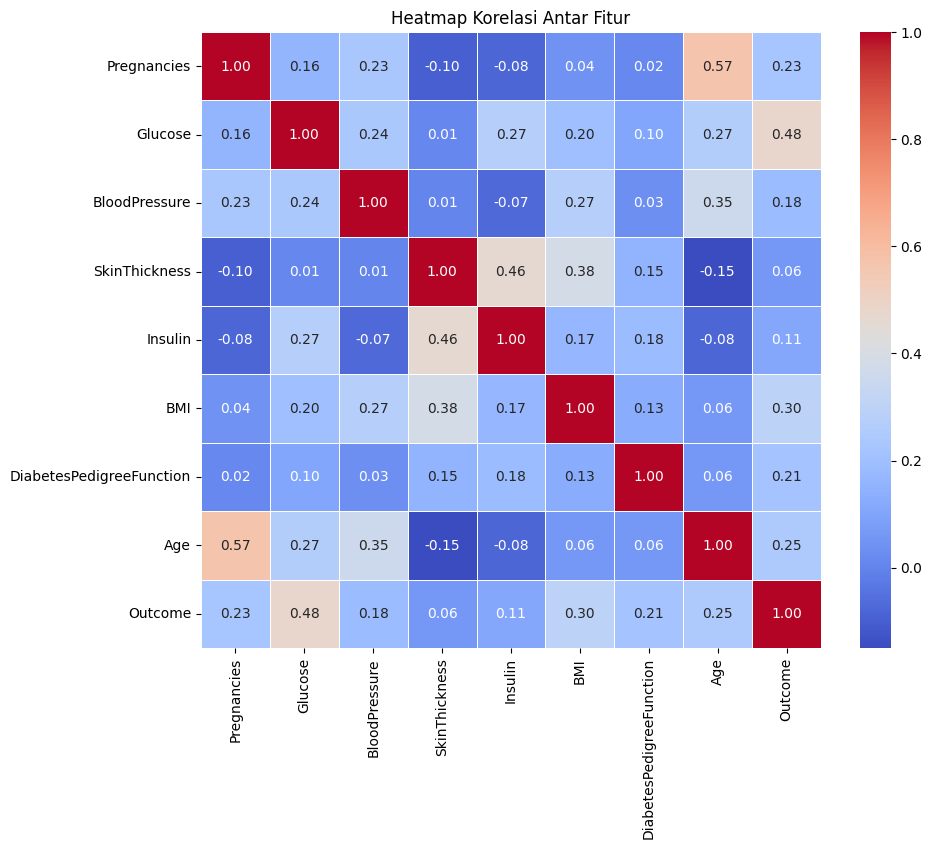

In [31]:
# 2. Heatmap untuk melihat korelasi antar fitur
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

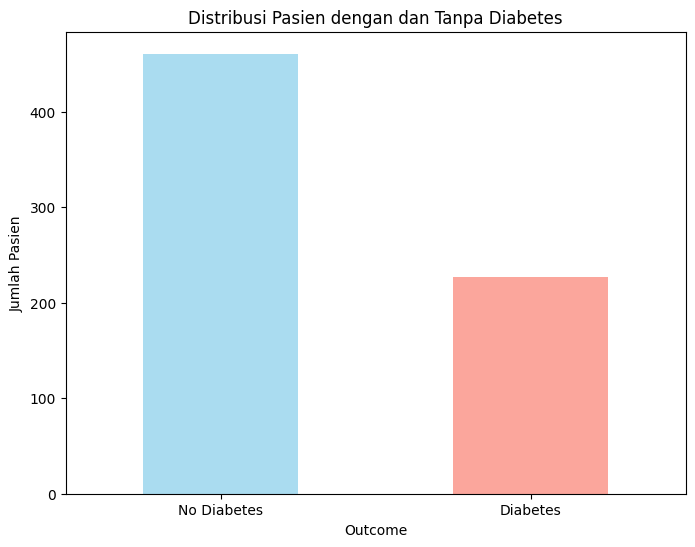

In [32]:
# 3. Bar Chart untuk distribusi data (Diabetes vs Tidak Diabetes)
plt.figure(figsize=(8, 6))
data['Outcome'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7)
plt.title('Distribusi Pasien dengan dan Tanpa Diabetes')
plt.xticks(ticks=[0, 1], labels=['No Diabetes', 'Diabetes'], rotation=0)
plt.ylabel('Jumlah Pasien')
plt.show()

### oversampling


In [33]:
# Menyeimbangkan dataset menggunakan SMOTE
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# SMOTE untuk menyeimbangkan data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [34]:
# Cek distribusi setelah SMOTE
print("\nDistribusi setelah SMOTE:\n", y_resampled.value_counts())


Distribusi setelah SMOTE:
 Outcome
1    461
0    461
Name: count, dtype: int64


### Normalisiasi data 

In [35]:
# Pilih salah satu normalisasi
scaler = MinMaxScaler()  # Bisa juga diganti dengan StandardScaler untuk Z-Score normalization
X_resampled_scaled = scaler.fit_transform(X_resampled)

### Feature Selection - Menggunakan RFE (Recursive Feature Elimination)

In [36]:
model = LogisticRegression()  # Bisa menggunakan model lain seperti RandomForestClassifier
selector = RFE(model, n_features_to_select=5)  # Memilih 5 fitur terbaik
X_selected = selector.fit_transform(X_resampled_scaled, y_resampled)

### Spliting

In [37]:
# Split data yang sudah diseimbangkan menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Model 


In [38]:
# Models to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [39]:
# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


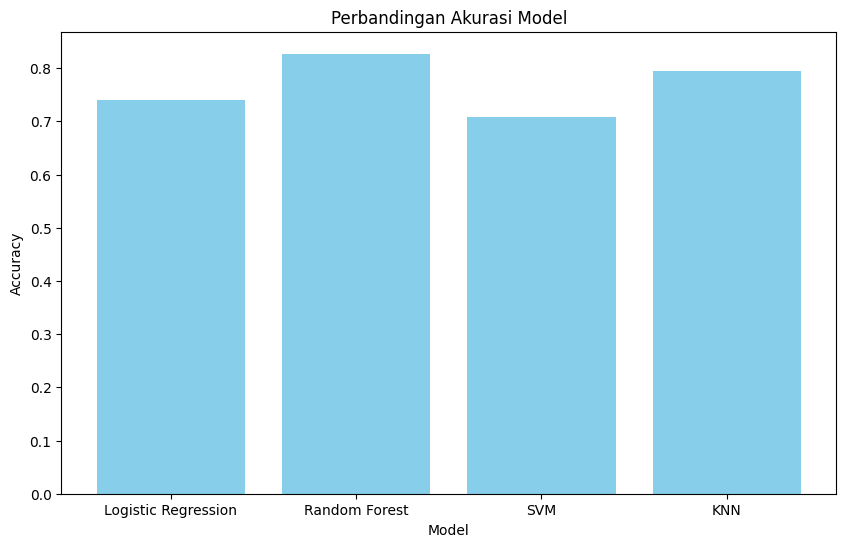

In [40]:
# Display results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Perbandingan Akurasi Model')
plt.show()

In [41]:
# Best Model Evaluation - Random Forest
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)


In [42]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

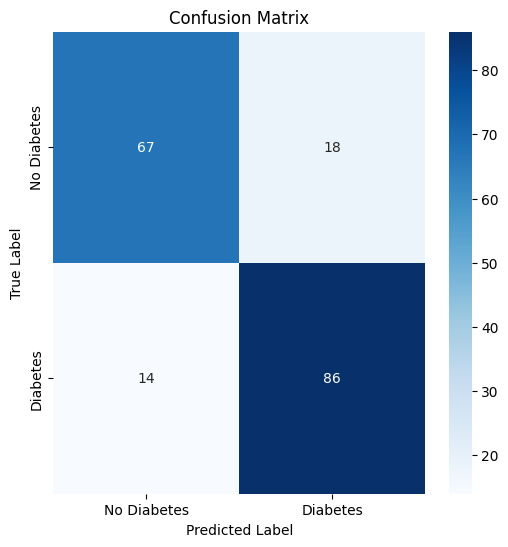

In [43]:
# Display Confusion Matrix as Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
# Display classification report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        85
           1       0.83      0.86      0.84       100

    accuracy                           0.83       185
   macro avg       0.83      0.82      0.83       185
weighted avg       0.83      0.83      0.83       185

